<a href="https://colab.research.google.com/github/emaalmar/Curriculum/blob/main/Analisis_de_datos_de_ventas_de_videojuegos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Verificar y manejar valores faltantes en las columnas criticas.

In [5]:
df_csv = pd.read_csv('/content/videojuegos.csv')
df_csv.head()

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42


In [9]:
df = df_csv

In [73]:
df2 = df.copy ()

In [81]:
df2

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
0,Super Mario Bros.,NES,1985,Platform,Nintendo,8.91,2.41,2.61,1.13,8.22
1,Call of Duty: Infinite Warfare,PS4,2016,Shooter,Activision,9.66,6.88,2.79,2.11,7.93
2,The Legend of Zelda: Breath of the Wild,Switch,2017,Action-Adventure,Nintendo,9.76,2.96,0.73,0.82,16.21
3,FIFA 21,PS4,2020,Sports,EA Sports,4.34,2.95,0.13,0.88,8.22
4,Minecraft,PC,2011,Sandbox,Mojang,3.50,1.24,4.82,1.19,16.42
5,The Witcher 3: Wild Hunt,PS4,2015,RPG,CD Projekt,1.68,5.45,4.46,1.46,6.75
6,Overwatch,PC,2016,Shooter,Blizzard,1.15,6.04,2.60,2.48,2.29
7,Pokemon Go,Mobile,2016,Augmented Reality,Niantic,2.35,3.47,4.73,0.67,7.29
8,GTA V,PS4,2013,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [17]:
print(df.head(1))

              Nombre Plataforma  Año_de_lanzamiento    Género    Editor  \
0  Super Mario Bros.        NES                1985  Platform  Nintendo   

   Ventas_NA  Ventas_EU  Ventas_JP  Ventas_Otros  Ventas_Global  
0       8.91       2.41       2.61          1.13           8.22  


In [14]:
df.tail(2)  # Muestra las últimas 'n' filas del DataFrame

,Nombre,Plataforma,Año_de_lanzamiento,Género,Editor,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
8,GTA V,PS4,2013,Action-Adventure,Rockstar Games,1.57,3.32,3.43,0.77,10.80
9,Animal Crossing: New Horizons,Switch,2020,Simulation,Nintendo,3.35,4.27,2.83,0.98,11.36


In [22]:
df.shape

(10, 10)

In [23]:
df.dtypes

,0
Nombre,object
Plataforma,object
Año_de_lanzamiento,int64
Género,object
Editor,object
Ventas_NA,float64
Ventas_EU,float64
Ventas_JP,float64
Ventas_Otros,float64
Ventas_Global,float64


In [25]:
df.describe()

,Año_de_lanzamiento,Ventas_NA,Ventas_EU,Ventas_JP,Ventas_Otros,Ventas_Global
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2012.900000,4.627000,3.899000,2.913000,1.249000,9.549000
std,10.181137,3.469076,1.751269,1.574837,0.603332,4.323174
min,1985.000000,1.150000,1.240000,0.130000,0.670000,2.290000
25%,2013.500000,1.847500,2.952500,2.602500,0.835000,7.450000
50%,2016.000000,3.425000,3.395000,2.810000,1.055000,8.220000
75%,2016.750000,7.767500,5.155000,4.202500,1.392500,11.220000
max,2020.000000,9.760000,6.880000,4.820000,2.480000,16.420000


In [26]:
df.count()

,0
Nombre,10
Plataforma,10
Año_de_lanzamiento,10
Género,10
Editor,10
Ventas_NA,10
Ventas_EU,10
Ventas_JP,10
Ventas_Otros,10
Ventas_Global,10


### **2.Analisis exploratorio**

Calcular el número total de juegos lanzados por año.

In [27]:
df['Año_de_lanzamiento'].value_counts ()

,count
Año_de_lanzamiento,
2016,3
2020,2
1985,1
2017,1
2011,1
2015,1
2013,1


Identificar las 10 plataformas con más títulos lanzados.

In [74]:
platform_counts = df['Plataforma'].value_counts()
platform_counts

,count
Plataforma,
PS4,4
Switch,2
PC,2
NES,1
Mobile,1


In [75]:
top_10_platforms = platform_counts.head(10)
print(top_10_platforms)

Plataforma
PS4       4
Switch    2
PC        2
NES       1
Mobile    1
Name: count, dtype: int64


Determinar los 5 géneros más populares en términos de cantidad de juegos.

In [33]:
gender_counts = df['Género'].value_counts()
gender_counts

,count
Género,
Shooter,2
Action-Adventure,2
Platform,1
Sports,1
Sandbox,1
RPG,1
Augmented Reality,1
Simulation,1


In [34]:
top_5_gender = gender_counts.head(5)
print(top_5_gender)

Género
Shooter             2
Action-Adventure    2
Platform            1
Sports              1
Sandbox             1
Name: count, dtype: int64


### **3. Anailis de ventas**

Calcular las ventas totales por región y compararlas

In [42]:
region_sales = df[['Ventas_NA', 'Ventas_EU', 'Ventas_JP', 'Ventas_Otros','Ventas_Global']].sum()
region_sales

,0
Ventas_NA,46.27
Ventas_EU,38.99
Ventas_JP,29.13
Ventas_Otros,12.49
Ventas_Global,95.49


Encontrar el videojuego más vendido de cada genero

In [50]:
top_gender_sales = df.groupby('Género')['Ventas_Global'].idxmax()
top_gender_sales

,Ventas_Global
Género,
Action-Adventure,2
Augmented Reality,7
Platform,0
RPG,5
Sandbox,4
Shooter,1
Simulation,9
Sports,3


In [60]:

print(df.loc[top_gender_sales])

                                    Nombre Plataforma  Año_de_lanzamiento  \
2  The Legend of Zelda: Breath of the Wild     Switch                2017   
7                               Pokemon Go     Mobile                2016   
0                        Super Mario Bros.        NES                1985   
5                 The Witcher 3: Wild Hunt        PS4                2015   
4                                Minecraft         PC                2011   
1           Call of Duty: Infinite Warfare        PS4                2016   
9            Animal Crossing: New Horizons     Switch                2020   
3                                  FIFA 21        PS4                2020   

              Género      Editor  Ventas_NA  Ventas_EU  Ventas_JP  \
2   Action-Adventure    Nintendo       9.76       2.96       0.73   
7  Augmented Reality     Niantic       2.35       3.47       4.73   
0           Platform    Nintendo       8.91       2.41       2.61   
5                RPG  CD Proje

In [67]:
# Get the names of the games with the highest global sales for each genre
# top_gender_sales_games = df.loc[top_gender_sales, 'Nombre'].tolist()

# Filter the DataFrame to include only those games
# filtered_df = df[df['Nombre'].isin(top_gender_sales_games)]

# Display the filtered DataFrame
# print(filtered_df)

Analizar las tendencias de ventas de los videojuegos a lo largo de los años.

In [69]:
top_year_sales = df.groupby('Año_de_lanzamiento')['Ventas_Global'].sum()
top_year_sales = top_year_sales.sort_values(ascending=False)
top_year_sales

,Ventas_Global
Año_de_lanzamiento,
2020,19.58
2016,17.51
2011,16.42
2017,16.21
2013,10.80
1985,8.22
2015,6.75


### **4. Visualizacion de datos**

Crear graficos para visualizar el numero de juegos lanzados cada año

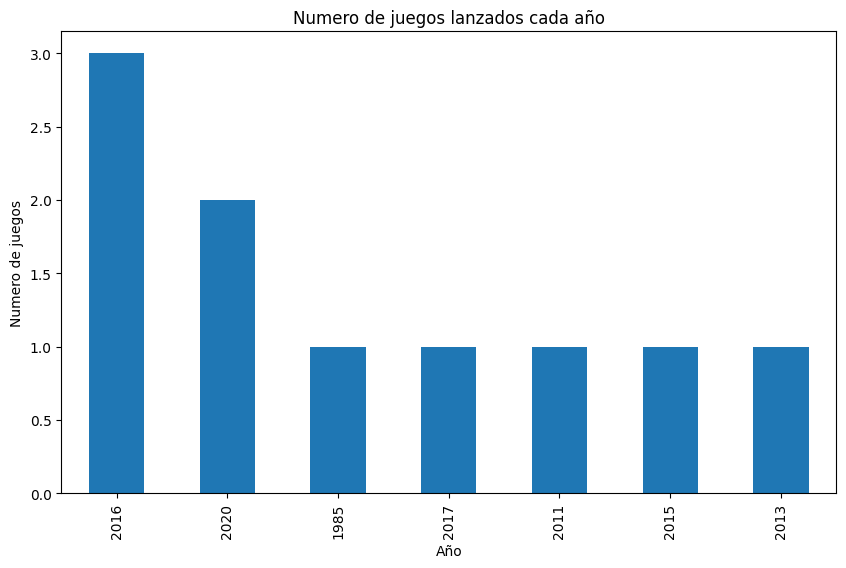

In [71]:
df['Año_de_lanzamiento'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Numero de juegos lanzados cada año')
plt.xlabel('Año')
plt.ylabel('Numero de juegos')
plt.show()

Graficar las ventas globales por género.

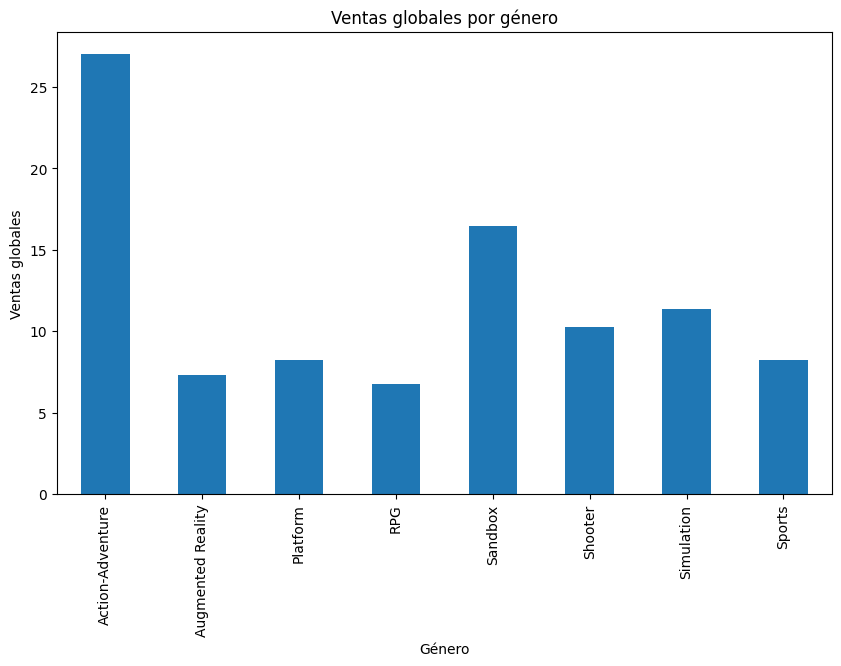

In [72]:
df.groupby('Género')['Ventas_Global'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas globales')
plt.show()


Realizar un gráfico de barras que muestre las ventas por plataforma.

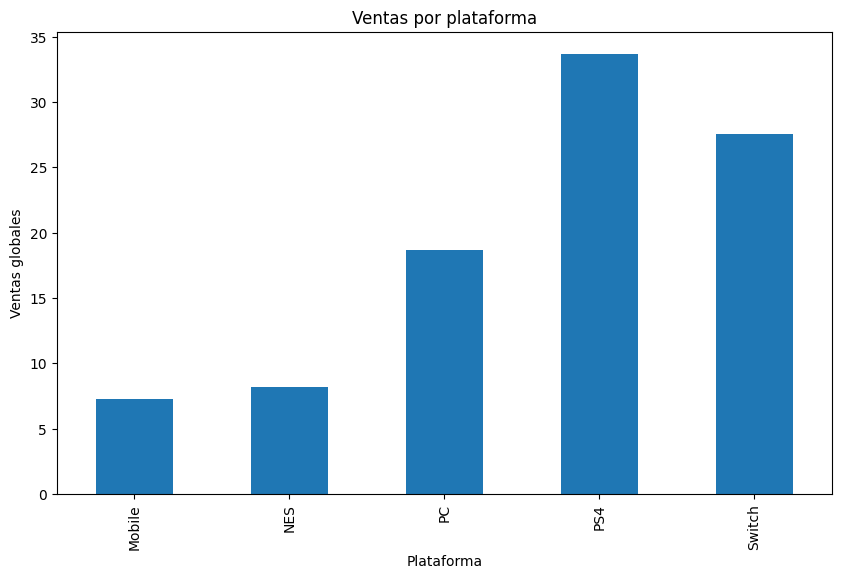

In [78]:
df.groupby('Plataforma')['Ventas_Global'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Ventas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.show()

In [82]:
# prompt: Extraer al menos tres insights interesantes del análisis.

# 1. Identificar los años con mayor lanzamiento de videojuegos.
top_years = df['Año_de_lanzamiento'].value_counts().head(5)
print("Años con mayor número de lanzamientos:")
print(top_years)

# 2.  Determinar la plataforma dominante y su influencia en las ventas.
platform_sales = df.groupby('Plataforma')['Ventas_Global'].sum().sort_values(ascending=False)
print("\nPlataformas con mayores ventas globales:")
print(platform_sales.head(5))

# 3. Analizar la correlación entre género y ventas globales para identificar géneros exitosos.
genre_sales = df.groupby('Género')['Ventas_Global'].sum().sort_values(ascending=False)
print("\nGéneros con mayores ventas globales:")
print(genre_sales.head(5))

Años con mayor número de lanzamientos:
Año_de_lanzamiento
2016    3
2020    2
1985    1
2017    1
2011    1
Name: count, dtype: int64

Plataformas con mayores ventas globales:
Plataforma
PS4       33.70
Switch    27.57
PC        18.71
NES        8.22
Mobile     7.29
Name: Ventas_Global, dtype: float64

Géneros con mayores ventas globales:
Género
Action-Adventure    27.01
Sandbox             16.42
Simulation          11.36
Shooter             10.22
Platform             8.22
Name: Ventas_Global, dtype: float64
